In [ ]:
import pandas as pd
import numpy as np

import importlib
import functions

importlib.reload(functions)

from functions import *

# df2, df = process_data("120000Z.json")
# df4, df3 = filter_data(df2)

df5, df = data_treatment("120000Z.json")


fromDFtoSQL(df, "fecha_hora", 0)


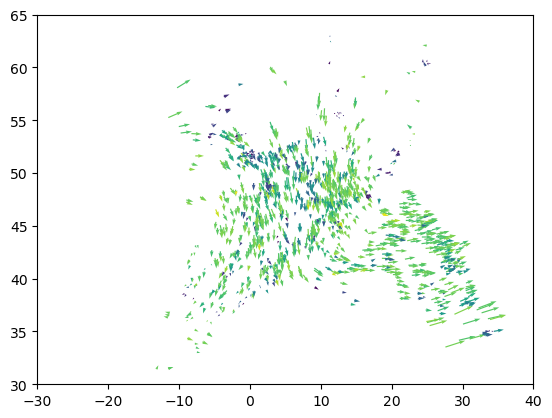

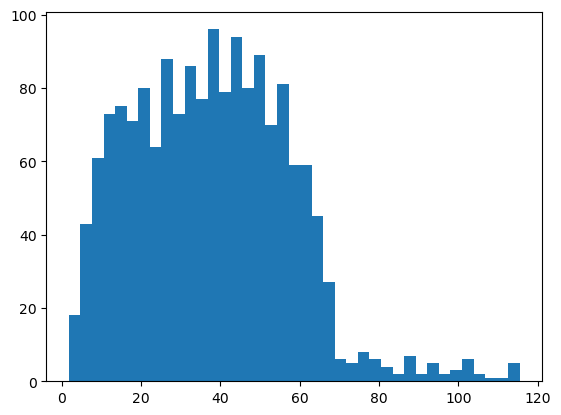

In [ ]:


df5, df = data_treatment("120000Z.json")


import matplotlib.pyplot as plt

plt.quiver(df5["lon"], df5["lat"], df5["Wx"], df5["Wy"],df5["alt_baro"])
plt.ylim(30, 65)
plt.xlim(-30, 40)
plt.show()

# log_data.hist(bins=40)
# plt.xlabel("Wind speed")
# plt.ylabel("Frequency")
# plt.title("Histogram of Wind Speed")
# plt.show()

bins = np.linspace(df5["W"].min(),df5["W"].max(), 40)
plt.hist(df5["W"], bins=bins)
plt.show()





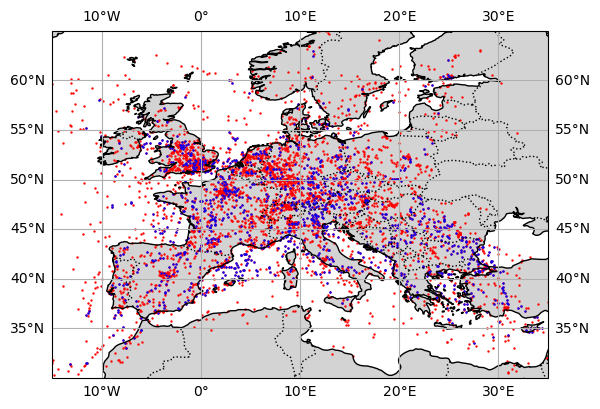

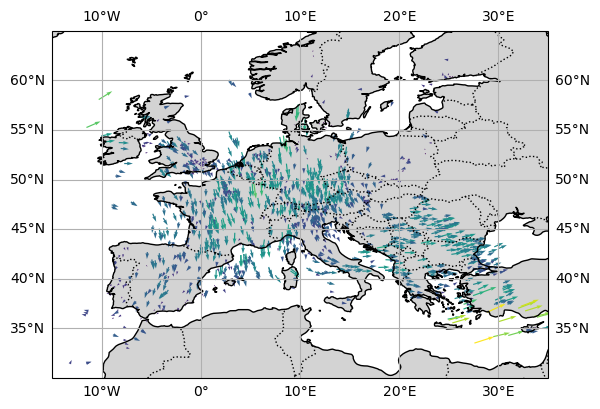

In [48]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())
# Dibujar mapa base
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()
ax.gridlines(draw_labels=True)

ax.scatter(df["lon"], df["lat"], color='red', s=0.5, transform=ccrs.PlateCarree())
ax.scatter(df5["lon"], df5["lat"], color='blue', s=0.5, transform=ccrs.PlateCarree())
plt.ylim(30, 65)
plt.xlim(-15, 35)
plt.show()

ax = plt.axes(projection=ccrs.PlateCarree())
# Dibujar mapa base
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()
ax.gridlines(draw_labels=True)
plt.quiver(df5["lon"], df5["lat"], df5["Wx"], df5["Wy"],df5["W"], transform=ccrs.PlateCarree())
plt.ylim(30, 65)
plt.xlim(-15, 35)
plt.show()


# ax = plt.axes(projection=ccrs.PlateCarree())
# # Dibujar mapa base
# ax.add_feature(cfeature.LAND, facecolor='lightgray')
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.set_global()
# ax.gridlines(draw_labels=True)
# plt.quiver(df4["lon"], df4["lat"], df4["Wx"], df4["Wy"],df4["W"], transform=ccrs.PlateCarree())
# plt.ylim(25, 45)
# plt.xlim(110, 145)
# plt.show()





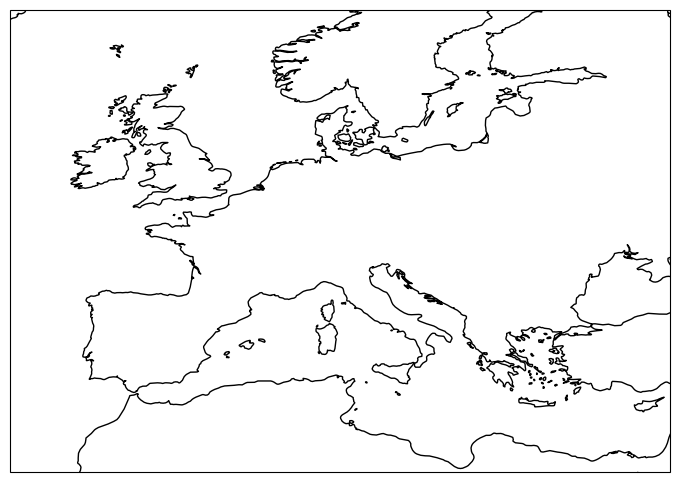

ModuleNotFoundError: No module named 'moviepy'

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import os


folder = "data"
files = [f"{h:02}0000Z.json" for h in range(0, 24)]

fig, ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_xlim(-15, 35)
ax.set_ylim(30, 65)

# Initialize a container to hold the quiver
quiver_container = [None]

def update(frame):
    filename = files[frame]
    df, df1 = data_treatment(os.path.join(folder, filename))

    if quiver_container[0] is not None:
        quiver_container[0].remove()
    
    # Create new quiver for this frame
    quiver_container[0] = ax.quiver(
        df["lon"], df["lat"], df["Wx"], df["Wy"], df["W"],
        transform=ccrs.PlateCarree(), cmap='viridis', 
        scale=20,            # adjust this number
        scale_units='xy',    # arrows scaled to data coordinates
        width=0.002          # thinner arrows look better on maps
    )
    
    ax.set_title(f"Time = {filename}")
    return quiver_container[0],

anim = FuncAnimation(fig, update, frames=len(files), interval=500, blit=False)
plt.show()

from IPython.display import HTML
HTML(anim.to_jshtml())

# anim.save("wind_animation.gif", writer="imagemagick", fps=5)
# anim.save("wind_animation.mp4", writer="ffmpeg", fps=5, dpi=150)



Processing file: data/000000Z.json
Original DataFrame size: 119610
Cleaned DataFrame size: 19962


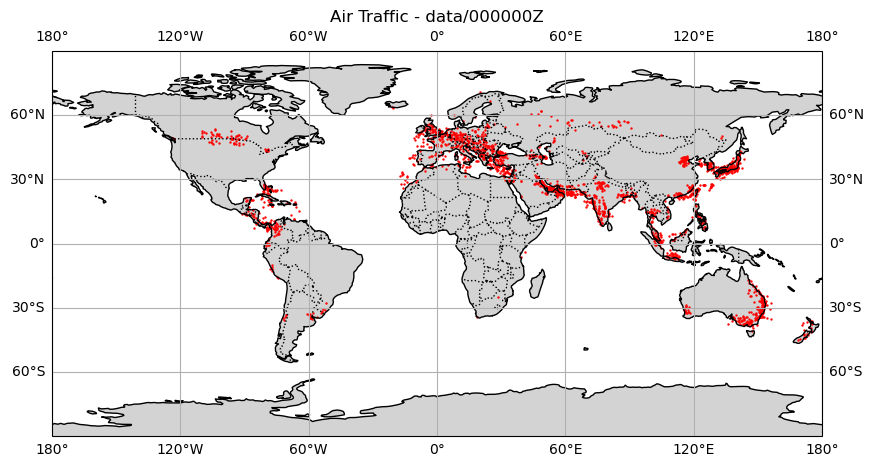

Processing file: data/010000Z.json
Original DataFrame size: 108990
Cleaned DataFrame size: 20772


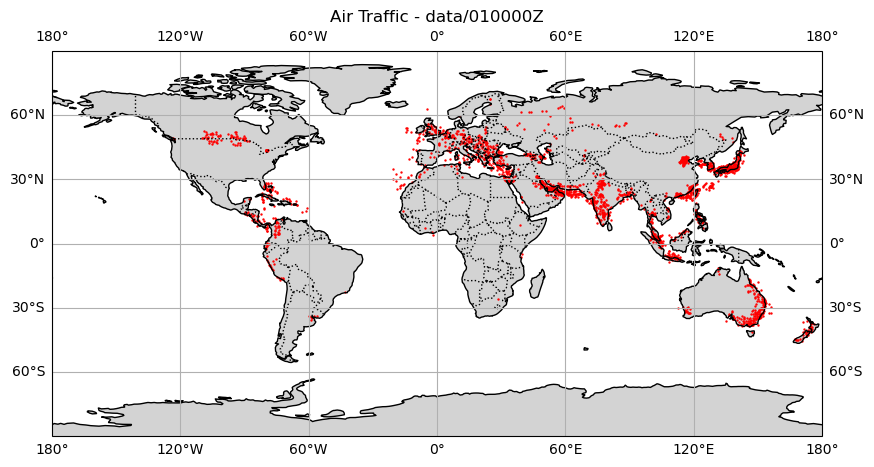

Processing file: data/020000Z.json
Original DataFrame size: 101871
Cleaned DataFrame size: 21348


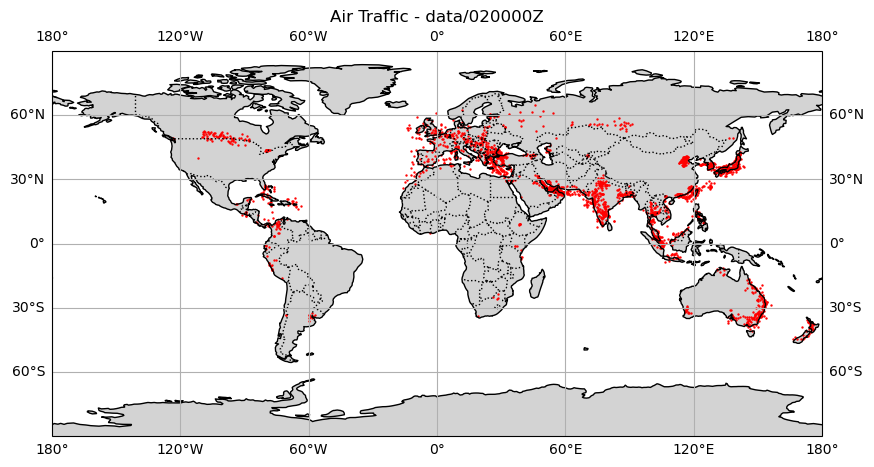

Processing file: data/030000Z.json
Original DataFrame size: 95607
Cleaned DataFrame size: 23859


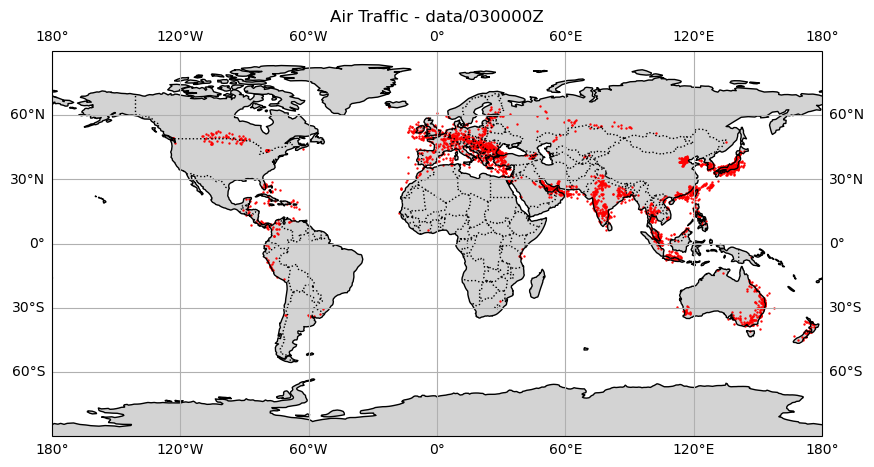

Processing file: data/040000Z.json
Original DataFrame size: 85167
Cleaned DataFrame size: 25704


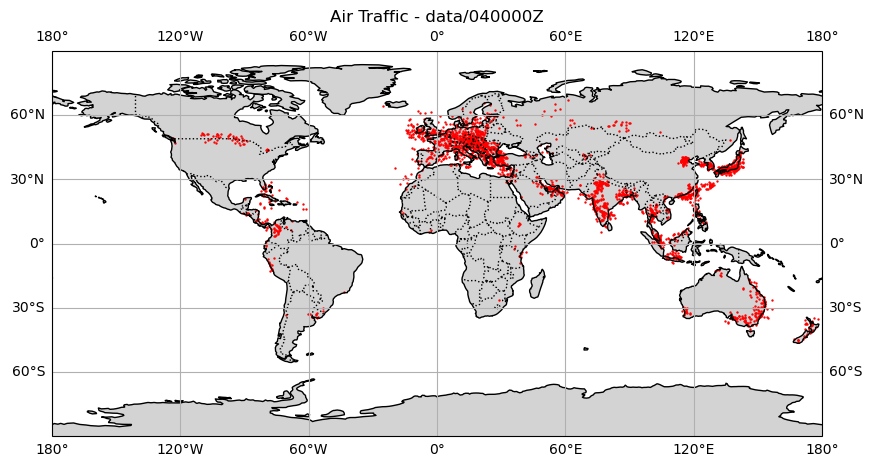

Processing file: data/050000Z.json
Original DataFrame size: 87057
Cleaned DataFrame size: 33453


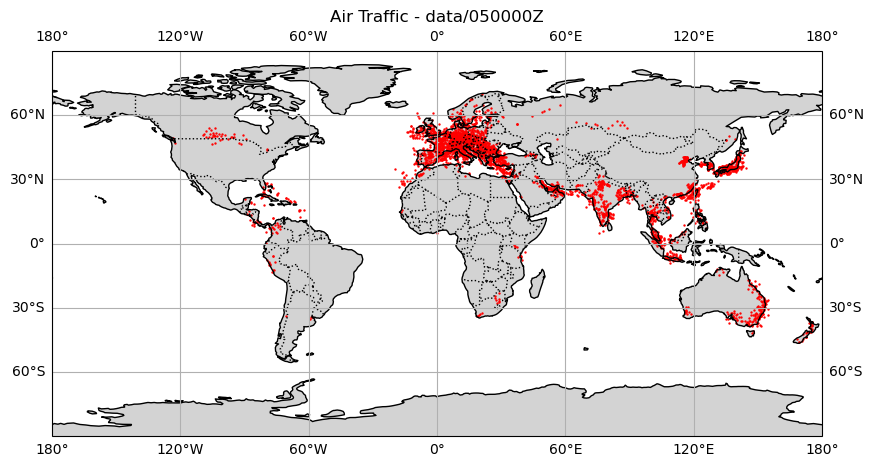

Processing file: data/060000Z.json
Original DataFrame size: 90837
Cleaned DataFrame size: 40608


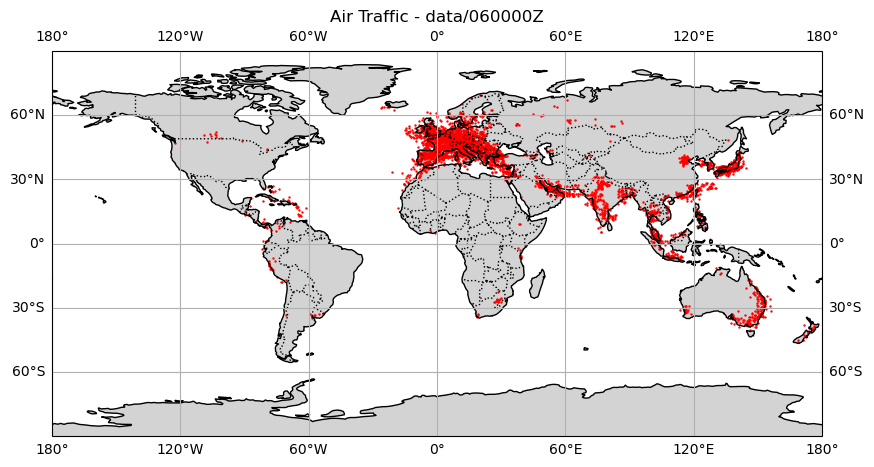

Processing file: data/070000Z.json
Original DataFrame size: 90594
Cleaned DataFrame size: 40023


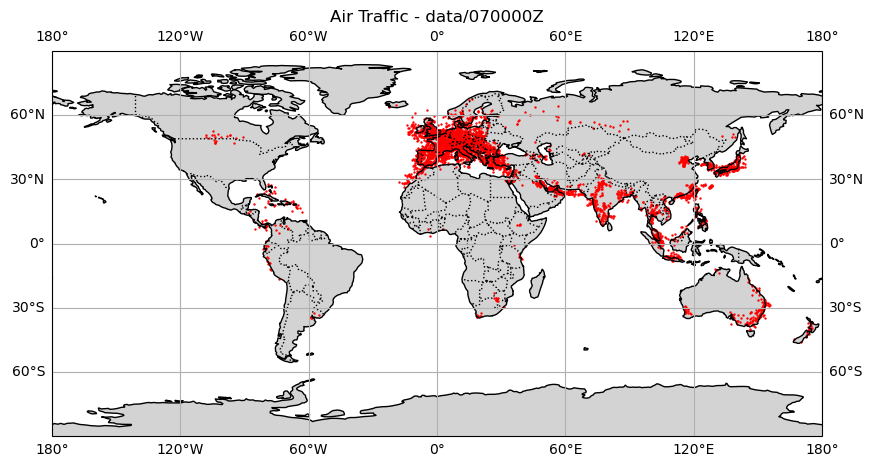

Processing file: data/080000Z.json
Original DataFrame size: 92862
Cleaned DataFrame size: 41292


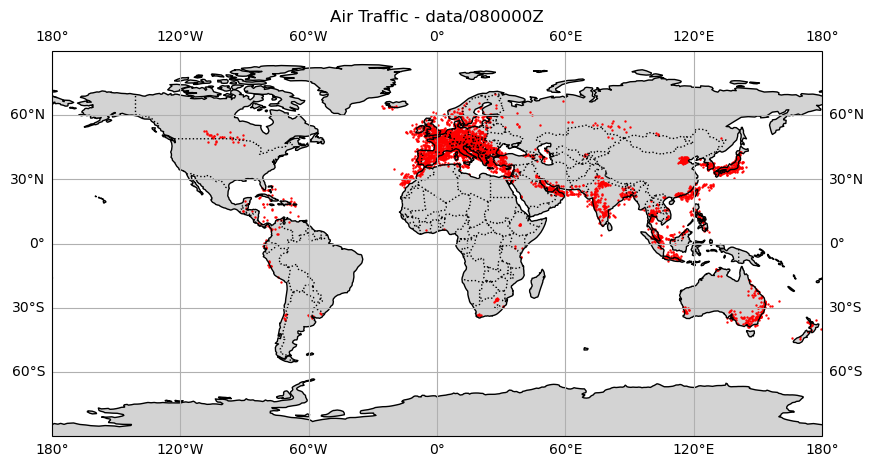

Processing file: data/090000Z.json
Original DataFrame size: 98226
Cleaned DataFrame size: 42795


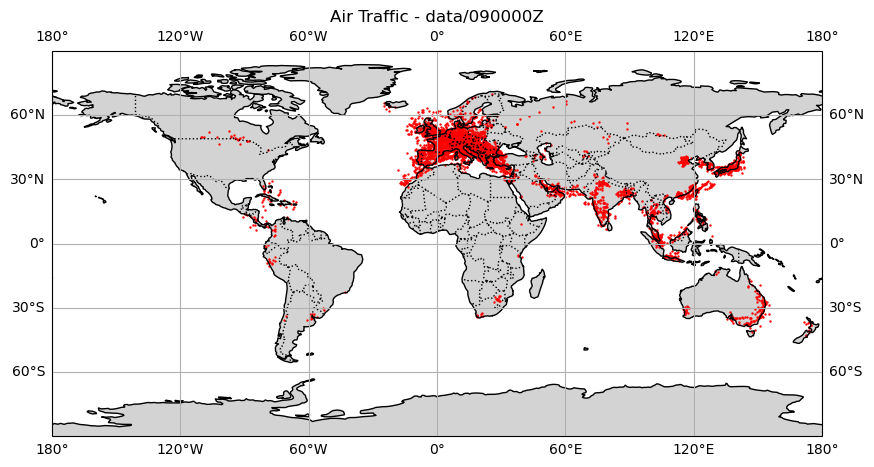

Processing file: data/100000Z.json
Original DataFrame size: 104706
Cleaned DataFrame size: 44082


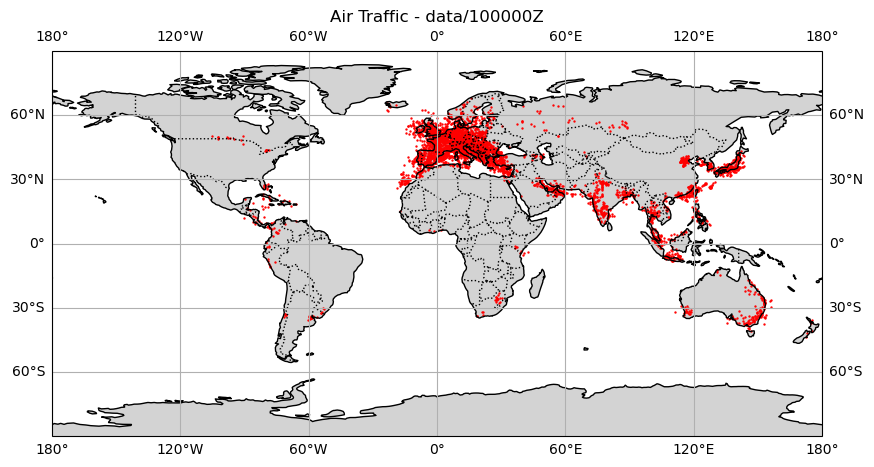

Processing file: data/110000Z.json
Original DataFrame size: 112824
Cleaned DataFrame size: 43812


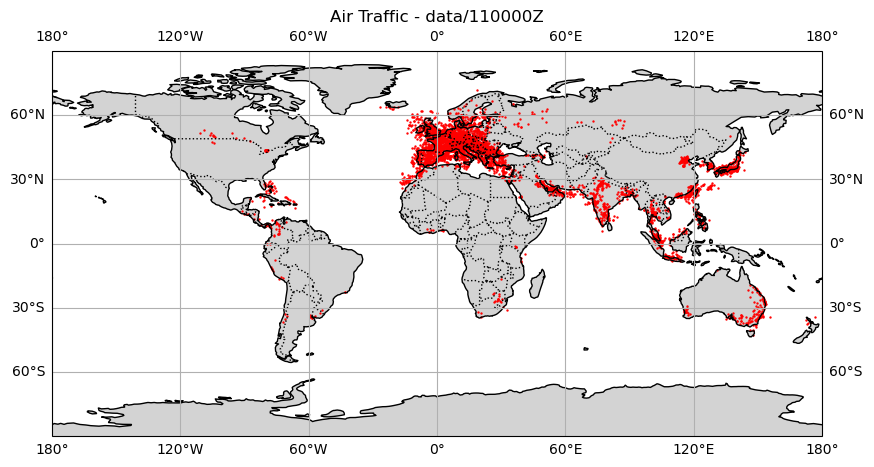

Processing file: data/120000Z.json
Original DataFrame size: 133848
Cleaned DataFrame size: 43650


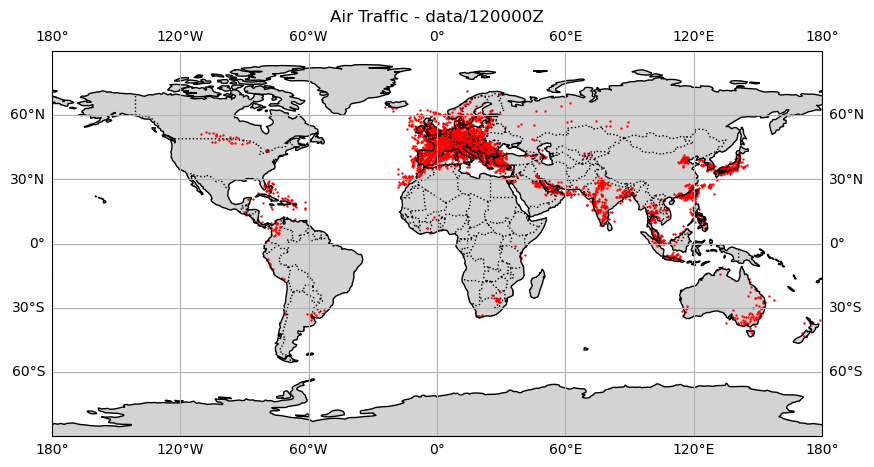

Processing file: data/130000Z.json
Original DataFrame size: 158184
Cleaned DataFrame size: 41004


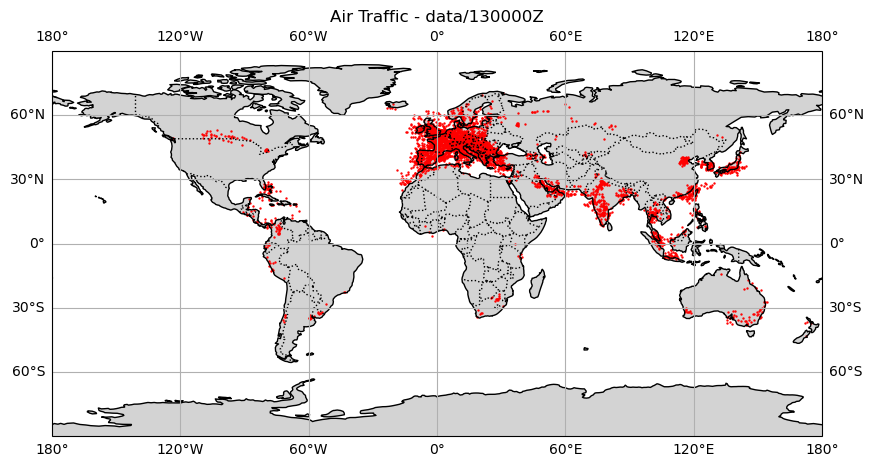

Processing file: data/140000Z.json
Original DataFrame size: 174645
Cleaned DataFrame size: 41274


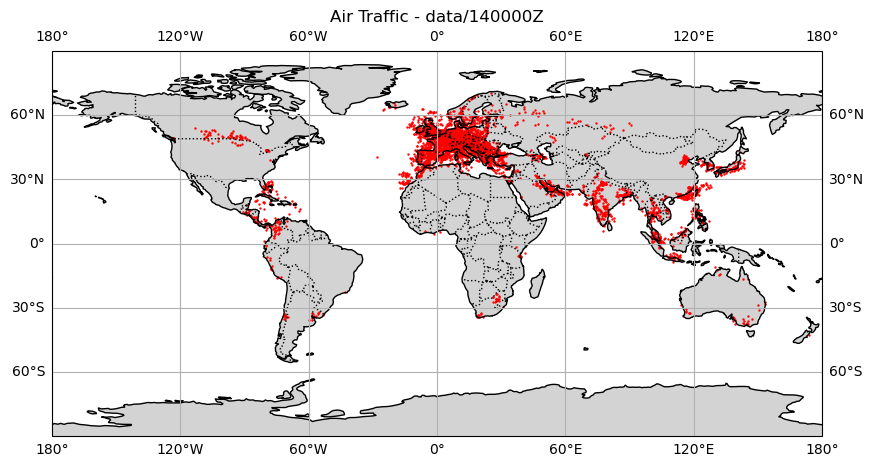

Processing file: data/150000Z.json
Original DataFrame size: 180027
Cleaned DataFrame size: 40392


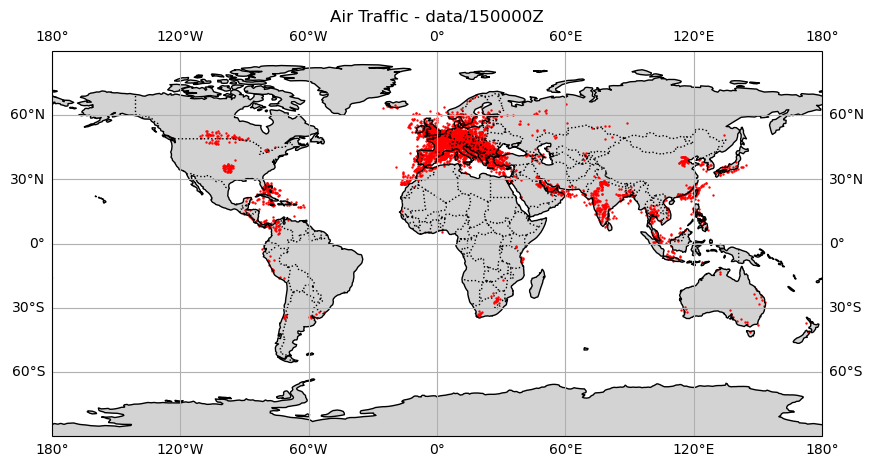

Processing file: data/160000Z.json
Original DataFrame size: 178371
Cleaned DataFrame size: 38556


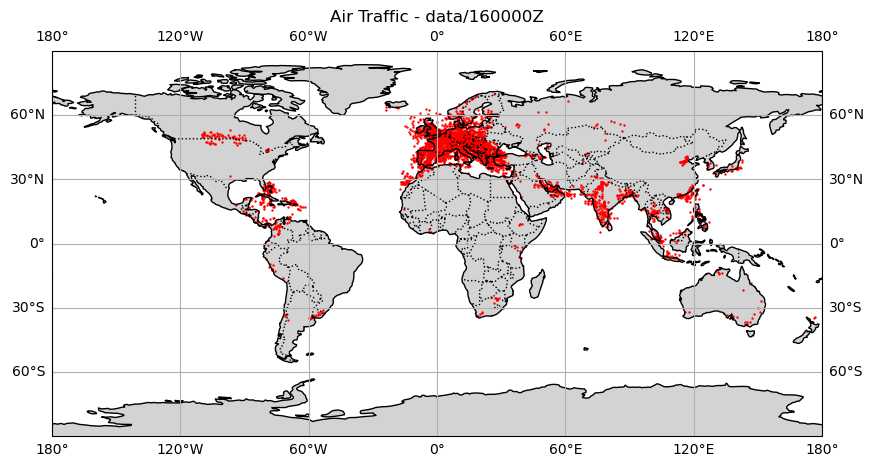

Processing file: data/170000Z.json
Original DataFrame size: 171063
Cleaned DataFrame size: 36603


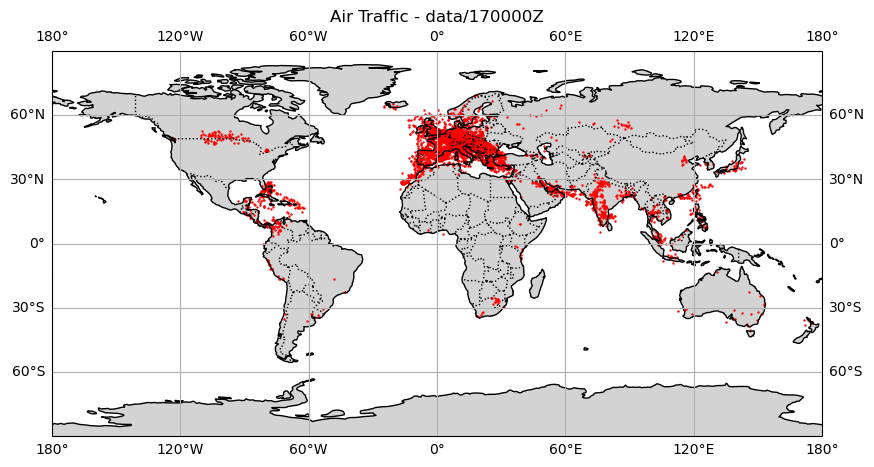

Processing file: data/180000Z.json
Original DataFrame size: 166329
Cleaned DataFrame size: 33615


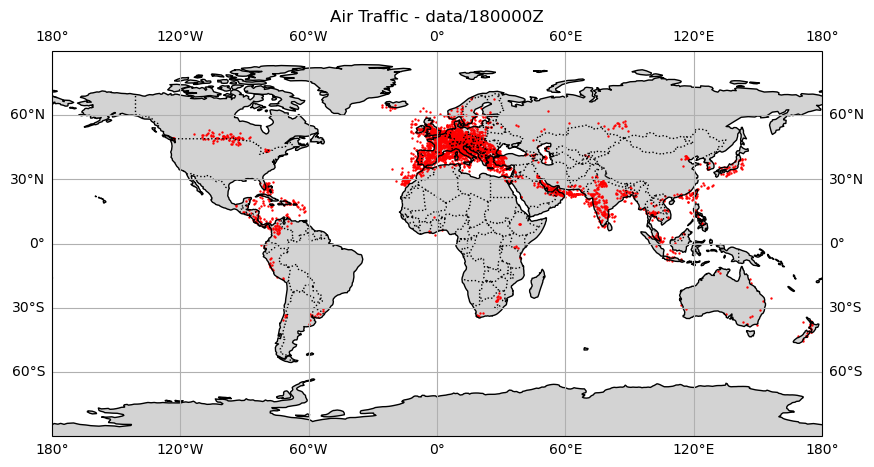

Processing file: data/190000Z.json
Original DataFrame size: 162162
Cleaned DataFrame size: 33993


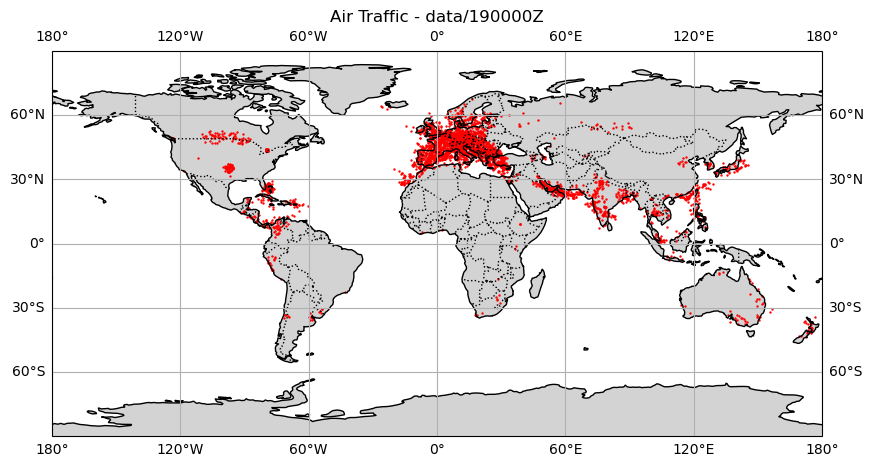

Processing file: data/200000Z.json
Original DataFrame size: 157464
Cleaned DataFrame size: 30618


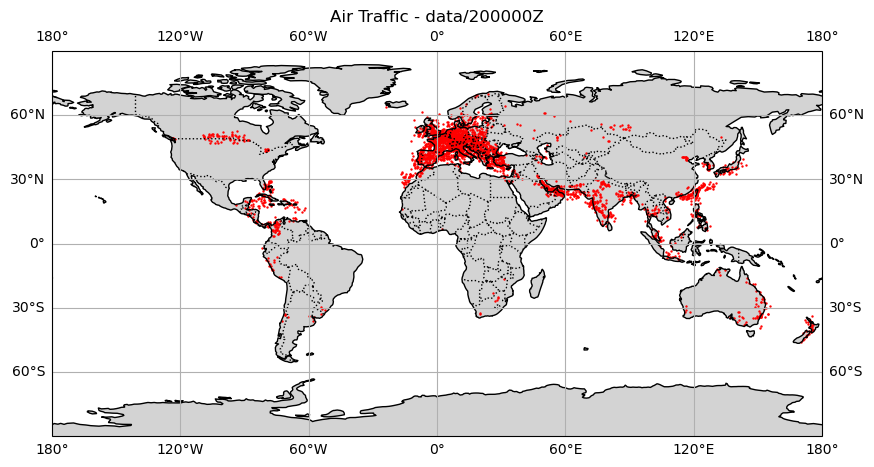

Processing file: data/210000Z.json
Original DataFrame size: 150120
Cleaned DataFrame size: 28233


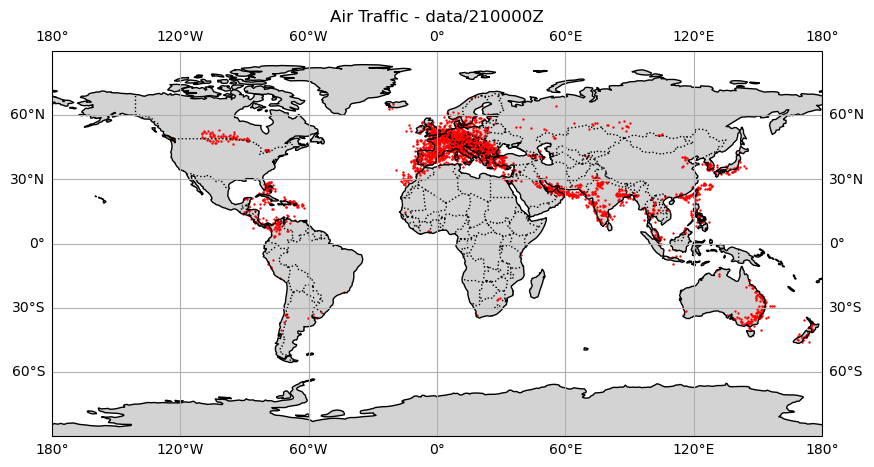

Processing file: data/220000Z.json
Original DataFrame size: 142128
Cleaned DataFrame size: 23220


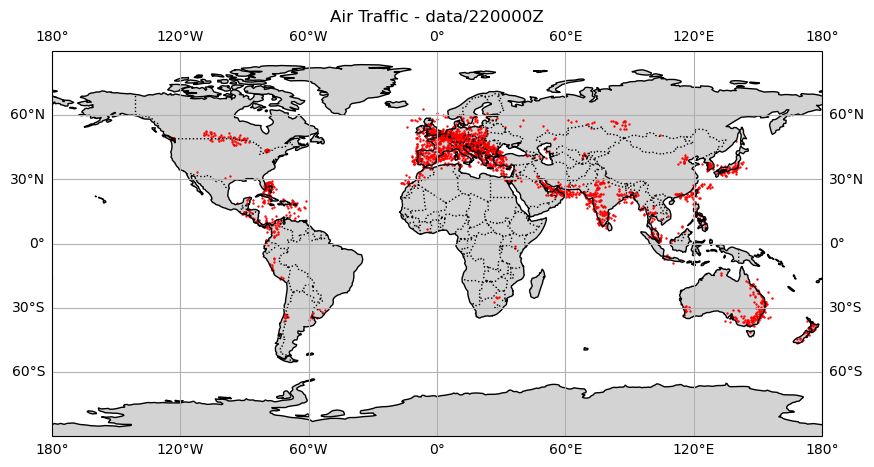

Processing file: data/230000Z.json
Original DataFrame size: 129303
Cleaned DataFrame size: 19620


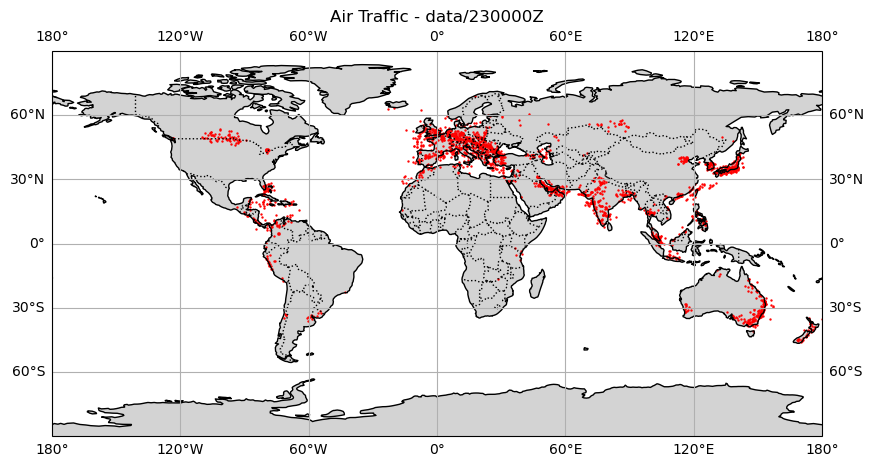

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import os

# Loop through every hour of the day (00 → 23)
for hour in range(24):
    # Generate filename in the format HH0000Z.json
    filename = f"data/{hour:02d}0000Z.json"
    
    # Check if the file exists
    if not os.path.exists(filename):
        print(f"File not found: {filename}")
        continue

    print(f"Processing file: {filename}")

    # Read JSON file
    df_origin = pd.read_json(filename)

    # Create a DataFrame with the relevant fields
    df = pd.DataFrame()
    df["hex"] = df_origin["aircraft"].apply(lambda x: x.get("hex"))
    df["lat"] = df_origin["aircraft"].apply(lambda x: x.get("lat"))
    df["lon"] = df_origin["aircraft"].apply(lambda x: x.get("lon"))
    df["alt_baro"] = df_origin["aircraft"].apply(lambda x: x.get("alt_baro"))
    df["gs"] = df_origin["aircraft"].apply(lambda x: x.get("gs"))
    df["tas"] = df_origin["aircraft"].apply(lambda x: x.get("tas"))
    df["track"] = df_origin["aircraft"].apply(lambda x: x.get("track"))
    df["mag_heading"] = df_origin["aircraft"].apply(lambda x: x.get("mag_heading"))
    df["true_heading"] = df_origin["aircraft"].apply(lambda x: x.get("true_heading"))

    print("Original DataFrame size:", df.size)

    # Drop rows with missing values (except 'true_heading')
    df1 = df.dropna(subset=[col for col in df.columns if col != "true_heading"])

    print("Cleaned DataFrame size:", df1.size)

    # Create figure and base map
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_global()
    ax.gridlines(draw_labels=True)

    # Plot aircraft positions
    ax.scatter(df1["lon"], df1["lat"], color='red', s=0.5, transform=ccrs.PlateCarree())

    # Add title with the hour (from the filename)
    plt.title(f"Air Traffic - {filename[:-5]}")

    # Show or save figure
    plt.show()
    # If you prefer saving each plot instead of showing it:
    # plt.savefig(f"map_{filename[:-5]}.png", dpi=300)
    plt.close()


Processing data/000000Z.json ...
Processing data/010000Z.json ...
Processing data/020000Z.json ...
Processing data/030000Z.json ...
Processing data/040000Z.json ...
Processing data/050000Z.json ...
Processing data/060000Z.json ...
Processing data/070000Z.json ...
Processing data/080000Z.json ...
Processing data/090000Z.json ...
Processing data/100000Z.json ...
Processing data/110000Z.json ...
Processing data/120000Z.json ...
Processing data/130000Z.json ...
Processing data/140000Z.json ...
Processing data/150000Z.json ...
Processing data/160000Z.json ...
Processing data/170000Z.json ...
Processing data/180000Z.json ...
Processing data/190000Z.json ...
Processing data/200000Z.json ...
Processing data/210000Z.json ...
Processing data/220000Z.json ...
Processing data/230000Z.json ...


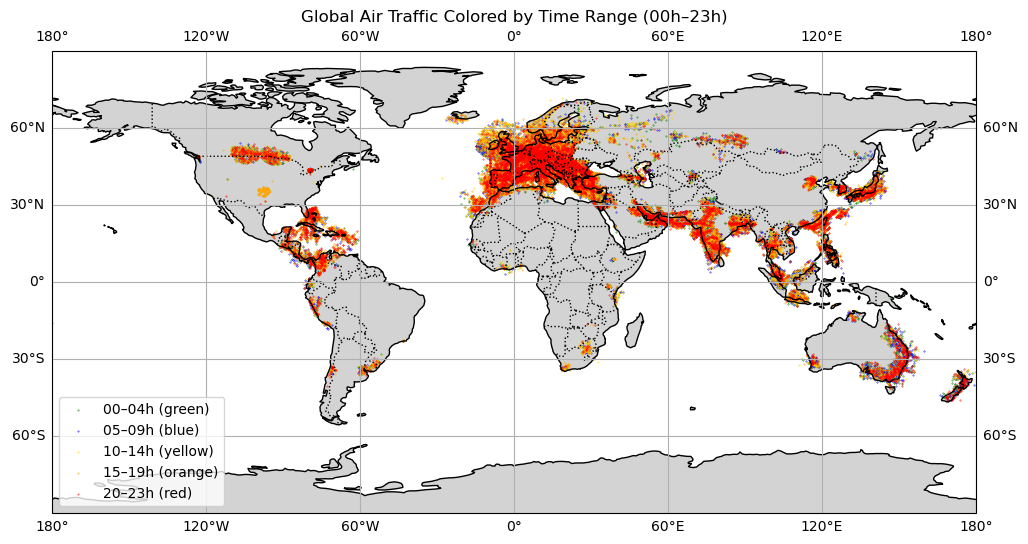

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import os

# Define color by hour ranges
def get_color(hour):
    if 0 <= hour <= 4:
        return "green"
    elif 5 <= hour <= 9:
        return "blue"
    elif 10 <= hour <= 14:
        return "gold"
    elif 15 <= hour <= 19:
        return "orange"
    else:
        return "red"

# Create one figure for all data
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()
ax.gridlines(draw_labels=True)

# Dictionary to store coordinates by color
color_data = { "green": [], "blue": [], "gold": [], "orange": [], "red": [] }

# Loop through all 24 hourly files
for hour in range(24):
    filename = f"data/{hour:02d}0000Z.json"
    if not os.path.exists(filename):
        print(f"File not found: {filename}")
        continue

    print(f"Processing {filename} ...")
    df_origin = pd.read_json(filename)

    # Extract aircraft data
    df = pd.DataFrame()

    df["hex"] = df_origin["aircraft"].apply(lambda x: x.get("hex"))
    df["lat"] = df_origin["aircraft"].apply(lambda x: x.get("lat"))
    df["lon"] = df_origin["aircraft"].apply(lambda x: x.get("lon"))
    df["alt_baro"] = df_origin["aircraft"].apply(lambda x: x.get("alt_baro"))
    df["gs"] = df_origin["aircraft"].apply(lambda x: x.get("gs"))
    df["tas"] = df_origin["aircraft"].apply(lambda x: x.get("tas"))
    df["track"] = df_origin["aircraft"].apply(lambda x: x.get("track"))
    df["mag_heading"] = df_origin["aircraft"].apply(lambda x: x.get("mag_heading"))
    df["true_heading"] = df_origin["aircraft"].apply(lambda x: x.get("true_heading"))
    
    df1 = df.dropna()

    color = get_color(hour)
    color_data[color].extend(list(zip(df1["lon"], df1["lat"])))

# Plot each time range in different color
for color, coords in color_data.items():
    if coords:
        lons, lats = zip(*coords)
        ax.scatter(lons, lats, s=0.1, color=color, transform=ccrs.PlateCarree(), label=color)

# Add legend and title
plt.legend(
    labels=[
        "00–04h (green)",
        "05–09h (blue)",
        "10–14h (yellow)",
        "15–19h (orange)",
        "20–23h (red)"
    ],
    loc="lower left",
)
plt.title("Global Air Traffic Colored by Time Range (00h–23h)")
plt.show()
